# North Atlantic Overturning Streamfunction

In order to illustrate the behavior of the `Psi_Thermwind` module, we will calculate the thermal wind based overturning streamfunction on the northern boundary of a prescribed Atlantic basin.

First, we must import the necesarry python libraries, including the `Psi_Thermwind` submodule of the `pymoc` library, `numpy`, and the `pyplot` plotting library.

In [1]:
from pymoc.modules import Psi_Thermwind
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

/Users/mbueti/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Next, we prescribe a buoyancy profile in the basin $b_{basin}(z)=0.03\cdot e^{z/300}-0.0004$

In [2]:
def b_basin(z):
  return 0.03 * np.exp(z / 300.) - 0.0004

And a vertical grid with a 100m resolution down to a depth of 4000m on which to calculate the buoyancy

In [3]:
z = np.asarray(np.linspace(-4000, 0, 100))

Finally, we initialize thermal wind closure with specified `b_basin` and `z`

In [4]:
m = Psi_Thermwind(z=z, b1=b_basin)

and solve for the overturning streamfunction, $\Psi$, where

$$\partial_{zz}\Psi=-\frac{b_{basin}(z)}{f}$$

given that $f$ is the coriolis frequency.

In [5]:
m.solve()

We can now plot the buoyancy profile in the basin (blue) and see how it is balanced by the overturning streamfunction (red)

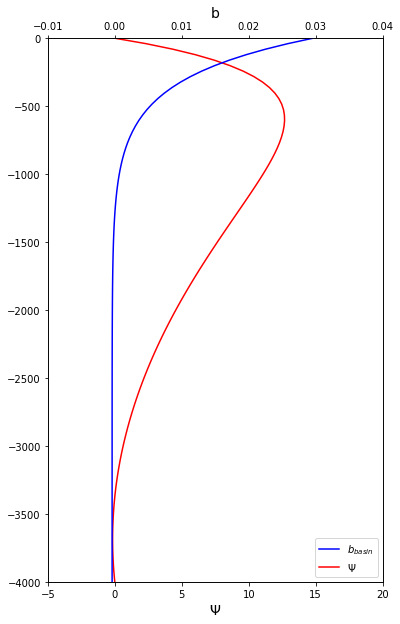

In [6]:
fig = plt.figure(figsize=(6, 10))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
lb = ax2.plot(b_basin(m.z), m.z, color='b', label='$b_{basin}$')
lpsi = ax1.plot(m.Psi, m.z, color='r', label='$\Psi$')
plt.ylim((-4e3, 0))
ax1.set_xlim((-5, 20))
ax2.set_xlim((-0.01, 0.04))
ax1.set_xlabel('$\Psi$', fontsize=14)
ax2.set_xlabel('b', fontsize=14)
lines = lb + lpsi
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc='lower right')

This is equivalent to the analytical solution
$$
\partial_{zz}\Psi=-\frac{0.03\cdot e^{z/300}-0.0004}{f}\\
\Psi(z=0)=\Psi(z=-4000)=0\\
\Psi(z) = \frac{0.04\cdot z^2+147.5\cdot z+2.75\cdot10^5\left(1-e^z/300\right)}{100f}\\
$$

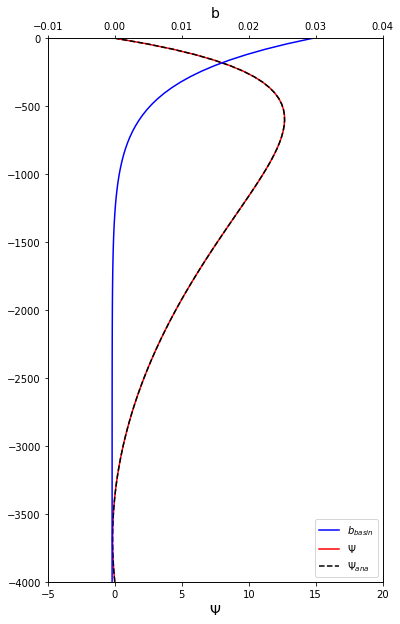

In [11]:
fig = plt.figure(figsize=(6, 10))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
lb = ax2.plot(b_basin(m.z), m.z, color='b', label='$b_{basin}$')
psi = (z**2/50+147.5*z+2.7e5-2.7e5*np.exp(z/300))/(100*m.f)
# Convert to Sverdrups
psi = psi/1e6
lpsi_sol = ax1.plot(m.Psi, m.z, color='r', label='$\Psi$')
lpsi_ana = ax1.plot(psi, m.z, 'k--', label='$\Psi_{ana}$')
plt.ylim((-4e3, 0))
ax1.set_xlim((-5, 20))
ax2.set_xlim((-0.01, 0.04))
ax1.set_xlabel('$\Psi$', fontsize=14)
ax2.set_xlabel('b', fontsize=14)
lines = lb + lpsi + lpsi_ana
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc='lower right')

While the solution for the thermal wind balance between an exponentially decaying buoyancy profile and a neutral one is trivial to solve analytically, this module provides a method for the overturning circulation that couples ocean basins of arbitrary and often temporally evolving buoyancy profiles.